# Data Job Compensation Analysis 
 - Donghang Wu ©2022

### Project Goals

While switching to a data related career, I was intrigued in gauging into salary data of such a career to gain insights of how different roles are valued in employers' perspectives

The goal of this project is to gain insight into the possble **factors** that affect data related job salaries, and build ***easy to interpret*** **predictive models** *(ie. not having a 99% R2 Score model with 50 features of improbable interpretability)*

The project used many **EDA plots/graphs** to gain insights of each feature's relationship to target (salary). To minimize the amount of feature included in model construction without compromising data and model integrity, I used **empirical evidence (plots and hypothesis testings)** in determining outliers and feature relations

It is important to note that **Linear Regression (OLS)** is the **base model** for ***coefficient interpretation*** and ***R2 Score reference***

In later parts, I utilize **regularized** and **ensemble models** in effort of enhancing model performance without changing or adding features, comparing models' performance and advantages/disadvantages


### Process Notes

As of October, 2022. To use the **TWO** modules in the [**Appendix**](#A-1), make sure to import related **Python files (or copy related code)** I created. ***Note*** that these two modules are **greedy** in finding the best parameters for the two tree ensemble models, you may need to manually fiddle some codes in order to find the optimal parameters.

***I will improve the BestForest/BestGB module (A module that displays parameter vs. R2 Score) upon demand.*** Personally I find tunning for optimal hyperparameter to be better this way; it can give me valuable insights of how R2 Score changes as parameters change. However, it can be very time consuming at times, so please use at own discretion

Here are a few questions that this project has sought to answer:
- What's the ideal size of company and employment type for a data job?
- Does some of the categorical different given in the data actually make a difference in salary?
- What are the most important factor (feature) in determinig data job salary?
- Does the model predicted make sense comparing to data job salaries claimed on the internet?
- What is someone like me's predicted salary? (An entry level Data Scientist living in a developing country)


### Data sources

The csv file is a popular data salary dataset on [**Kaggle**](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries). 

According to author, the original data is aggregated and provided by [ai-jobs.net](https://www.ai-jobs.net)


### Evaluation and insights

I was able to obtain an R2 Score of 46% with ***8 features*** (all dummies) on validation set (20% of data) using a manually tuned **RandomForestRegressor**, with **LinearRegression (OLS)** slightly behind (~42% R2 Score). 

Check [here](#5-2-2) for **model comparison**. Check [here](#4-2) if you are interested in **feature interpretation**.
Note that all models have balanced performance (comparable R2 Score) between trainning and test data.

Much effort were put into feature engineering to simplify model construction as much as possible, ***some examples***:
1. Non-fulltime employment types make up less than 5% of total data, we dropped those 5% and the `employment_type` feature
1. Those jobs with **50** `remote_ratio` has siginifcantly lower wages comparing to fully remote/on-site ones, while fully remote/on-site jobs' salary are not statistically different at 95% CI.
1. Only **small companies' salary** are ***statistically lower at 95% CI***, while **medium and large companies' salary** are not ***statistically different at 95% CI***.
1. Countries are grouped into **Developing** and **Developed** using ***150% GPD per Capita (PPP)*** as the split point. Data provided by [worldmeters.com](https://www.worldometers.info/gdp/gdp-per-capita/)
1. Those who reside and work in a **developing country** has particularly **lower salaries**, despite all other factors remain unchanged
- For more **early insights**, check out [EDA insights](#1-3-1) 

## About Dataset

### Content
- **Column names & Description** 
    - **work_year**: The year the salary was paid. 
    - **experience_level**: The experience level in the job during the year with the following possible values
        - **EN** Entry-level
        - **MI** Junior Mid-level
        - **SE** Intermediate Senior-level
        - **EX** Expert Executive-level / Director
    - **employment_type**:	The type of employement for the role
        - **PT** Part-time 
        - **FT** Full-time 
        - **CT** Contract 
        - **FL** Freelance
    - **job_title**: The role worked in during the year.
    - **salary**: The total gross salary amount paid.
    - **salary_currency**: The currency of the salary paid as an ISO 4217 currency code.
    - **salary_in_usd**: The salary in USD (FX rate divided by avg. USD rate for the respective year via [fxdata.foorilla.com](https://fxdata.foorilla.com/).
    - **employee_residence**: Employee's primary country of residence in during the work year as an ISO 3166 country code.
    - **remote_ratio**: The overall amount of work done remotely, possible values are as follows
        - **0** No remote work (less than 20%) 
        - **50** Partially remote 
        - **100** Fully remote (more than 80%)
    - **company_location**: The country of the employer's main office or contracting branch as an ISO 3166 country code.
    - **company_size**: The average number of people that worked for the company during the year
        - **S** less than 50 employees (small) 
        - **M** 50 to 250 employees (medium) 
        - **L** more than 250 employees (large)


## Table of Contents

### - Step 1: Overview and EDA
- 1-1: [Early data exploration and early clean](#1-1) 
    - [Why dropping `salary` and `currency` ?](#1-1-1)
- 1-2: [Assuming ordinal relationship and categorizing data within features](#1-2)
    - [Which variables and why ?](#1-2-1)
- 1-3: [EDA between salary and categorical features](#1-3) **Countplots** for *frequency*, **boxen/histagram(kde)** for *distribution/spread)*
    - [EDA insights](#1-3-1) 
    - [Drop outliers](#1-3-2)

### - Step 2: Data cleaning and grouping
- 2-1: [Drop all `employment_type` except **Full-Time**](#2-1)
    - [Does working abroad jobs have lower salaries?](#2-1-1)
- 2-2: [Grouping country columns into two categories `developing` and `developed`](#2-2)
- 2-3: [Is `job_title` a meaningful feature in `ds_salary_FT`?](#2-3)
    - [Grouping `job_title` into *Analyst* and *Non-Analyst*](#3-3-1)
    

### - Step 3: Hypothesis testings on categorical feature groups
- 3-1: [Hypothesis Testings and feature groupings](#3-1)
    - [Does `work_year` makes a difference in salary?](#3-1-1)
    - [Does `remote_ratio` makes a difference in salary?](#3-1-2)
    - [Does *medium* or *large* `company_size` makes a difference in salary?](#3-1-3)    
- 3-2: [Final checks before OneHotEncoding features in `ds_salary_FT`](#3-2)


### - Step 4: Linear Regression models (OLS and L2 regularized)
- 4-1: [Linear Regression - base models](#4-1)
    - [Preprocessing - OneHotEncoding and StandardScaling](#4-1-1)
    - [Linear Regression Fitting and Results](#4-1-2)
- 4-2: [Model coefficients interpretation](#4-2)


### - Step 5: Ensemble methods to enhance model performance
- 5-1: [Tree based ensemble models](#5-1)
    - [Hyperparameter tunning - Plots & RandomSearchCV](#5-1-1) 
    - [Model Fitting and Evaluation](#5-1-2)
- 5-2: [Other ensemble models - Voting and Stacking](#5-2)
    - [Model Construction and Fitting](#5-2-1)
    - [Evaluation and Model comparison](#5-2-2)


### - Appendix: 


- [Finding best K for KNeighborsRegressor](#A-1)
- [Finding 'best' parameters for RandomForestRegressor (Manual Hyperparameter Tunning)](#A-2)
- [Finding 'best' parameters for GradientBoostingRegressor (Manual Hyperparameter Tunning)](#A-3)

### Universal package imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
pd.options.mode.chained_assignment = None 

## Step 1-1: Early data exploration and early clean <a name="1-1"></a>
- *dropped* **non-USD salary** and **currency**

In [2]:
ds_salary = pd.read_csv('ds_salaries.csv')

print(ds_salary.info())
# work_year should be 'nominal' as it is a categorical variable to present 'difference' in data year
ds_salary['work_year'] = ds_salary['work_year'].astype('object')

ds_salary.remote_ratio.unique()
# since remote ratio is split into 3 discrete levels, I will change it into a 'ordinal' category as well

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB
None


array([  0,  50, 100])

In [3]:
ds_salary.describe()

#notice salary's range is large (~597000) since there are different work modes (contractors gets paid in hours, thus can be low)
#very intersting that more than have of the people work full-time remote in data science field, in this dataset
#Unnamed: 0 should be the index (ie. ID)

,Unnamed: 0,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,3.240001e+05,112297.869852,70.92257
std,175.370085,1.544357e+06,70957.259411,40.70913
min,0.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,7.000000e+04,62726.000000,50.00000
50%,303.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,1.650000e+05,150000.000000,100.00000
max,606.000000,3.040000e+07,600000.000000,100.00000


In [4]:
ds_salary.sample(5)

# Get a feel for the data

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
342,342,2022,EX,FT,Head of Data Science,224000,USD,224000,US,100,US,M
321,321,2022,SE,FT,Data Engineer,220110,USD,220110,US,0,US,M
275,275,2021,EN,FT,Data Scientist,100000,USD,100000,US,100,US,M
417,417,2022,SE,FT,Data Science Engineer,60000,USD,60000,AR,100,MX,L
448,448,2022,SE,FT,Data Engineer,180000,USD,180000,US,100,US,M


### Why dropping `salary` and `currency` ? <a name="1-1-1"></a>

- Assuming data source is trustworth, in which `salary_in_usd` is calculated based on FXR at the time `salary` is given
- Converting a salary in 2020 using the current (late 2022) exchange rate **makes no sense**
    - Since there are significant geopolitical shifts that happened during this time
    - ex. COVID-19, Russia-Ukraine Conflict, US Fed interest increase 
    - Euro, British Pounds, and many other currencies depreciated in value comparing to USD

In [5]:
# thus, some intial clean-up, setting index and drop `salary` and `salary_currency`
ds_salary = ds_salary.rename({'Unnamed: 0': 'id'}, axis='columns')
ds_salary = ds_salary.set_index('id')
ds_salary = ds_salary.drop(['salary', 'salary_currency'], axis=1)

ds_salary.head(5)
# will be intersting to see if how compensation change if employee_residence differ for company_location 

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
id,,,,,,,,,
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


## Step 1-2: Assuming ordinal relationship and categorizing data within features  <a name="1-2"></a>

In [6]:
# general overview of the categories
print(ds_salary.experience_level.value_counts())
print('------------------------------------------')
print(ds_salary.remote_ratio.value_counts())
print('------------------------------------------')
print(ds_salary.company_size.value_counts())

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64
------------------------------------------
100    381
0      127
50      99
Name: remote_ratio, dtype: int64
------------------------------------------
M    326
L    198
S     83
Name: company_size, dtype: int64


### Assume `work_year`, `experience_level`, `employment_type`, `remote_ratio`, `company_size` to be 'oridinal' <a name="1-2-1"></a> 
- The assumptions mean salary proportionally increase or decrease as the 'rank' in these 'oridnal' variable changes
- Change `experience_level`, `employment_type`,  `remote_ratio`, `company_size` into ordinal categorical variable
    - will later varify if difference & trends truly exist between groups

In [7]:
#convert work_year, experience level, remote_ratio, company_szie into ordinal categories
year_cat = [2020, 2021, 2022]
ds_salary['work_year'] = pd.Categorical(ds_salary['work_year'], categories=year_cat, ordered=True)

exp_cat = ['EN', 'MI', 'SE', 'EX']
ds_salary['experience_level'] = pd.Categorical(ds_salary['experience_level'], categories=exp_cat, ordered=True)

employ_cat = ['FL', 'CT', 'PT', 'FT']
ds_salary['employment_type'] = pd.Categorical(ds_salary['employment_type'], categories=employ_cat, ordered=True)

remote_cat = [0, 50, 100]
ds_salary['remote_ratio'] = pd.Categorical(ds_salary['remote_ratio'], categories=remote_cat, ordered=True)

company_size_cat = ['S', 'M', 'L']
ds_salary['company_size'] = pd.Categorical(ds_salary['company_size'], categories=company_size_cat, ordered=True)

#double check if changes are in effect
print(ds_salary.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           607 non-null    category
 1   experience_level    607 non-null    category
 2   employment_type     607 non-null    category
 3   job_title           607 non-null    object  
 4   salary_in_usd       607 non-null    int64   
 5   employee_residence  607 non-null    object  
 6   remote_ratio        607 non-null    category
 7   company_location    607 non-null    object  
 8   company_size        607 non-null    category
dtypes: category(5), int64(1), object(3)
memory usage: 27.5+ KB
None


## Step 1-3: EDA between salary and categorical features - Split into Two Parts <a name="1-3"></a>
- categorical varibale **bar plots**
- relational **boxen plots** & **distributions** of different categorical variables vs. `salary_in_usd`

In [8]:
def make_plots(dataset):
    for column in range(len(dataset.columns)):
        if dataset.iloc[:, column].dtype == 'category':
            ax1 = sns.countplot(x=dataset.iloc[:, column])
            ax1.set_title(f'Countplot of {dataset.columns[column]}')
            plt.show()
            ax2 = sns.boxenplot(data=dataset, y='salary_in_usd', x=dataset.columns[column])
            ax2.set_title(f'Boxenplot of {dataset.columns[column]} vs. Salary in USD')
            ax3 = sns.displot(data=dataset, x='salary_in_usd', kde=True, hue=dataset.columns[column])
            plt.show()
            ax4 = sns.stripplot(data=ds_salary, y='salary_in_usd', x=dataset.columns[column], alpha=0.5)
            ax4.set_title(f'Scatterplot(jittered) of {dataset.columns[column]} vs. Salary in USD')            
            plt.show()
            print(f'------------The above is the 4 plots of {dataset.columns[column]} Category------------')

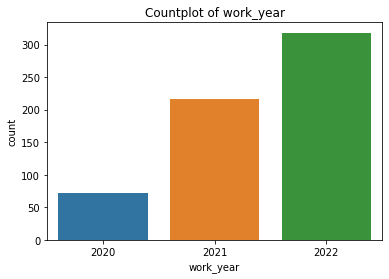

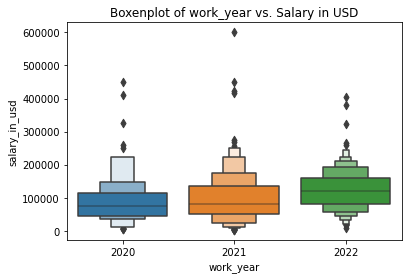

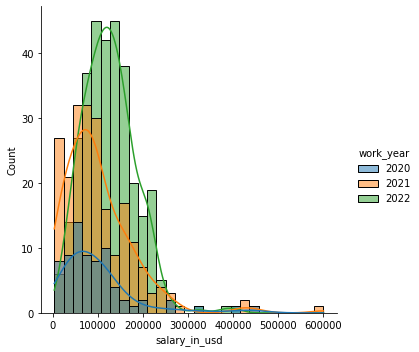

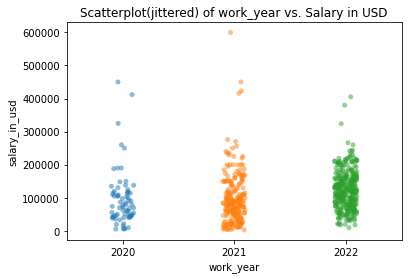

------------The above is the 4 plots of work_year Category------------


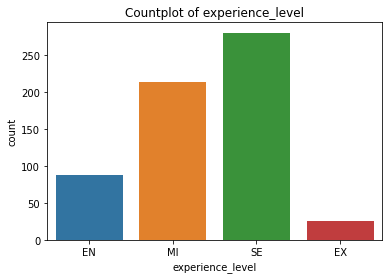

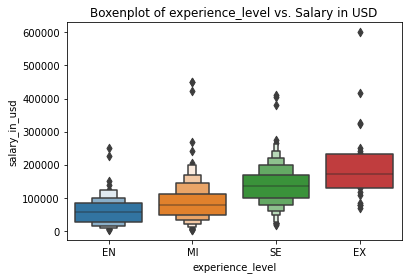

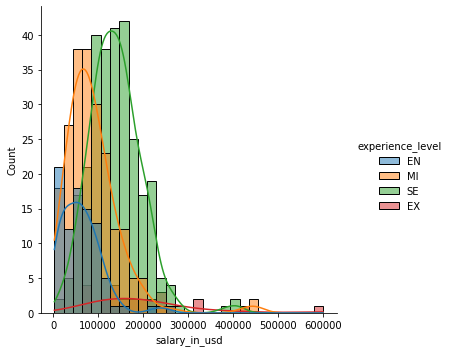

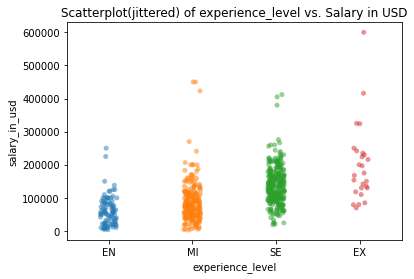

------------The above is the 4 plots of experience_level Category------------


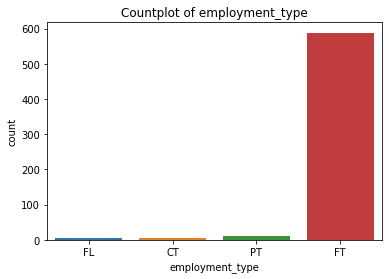

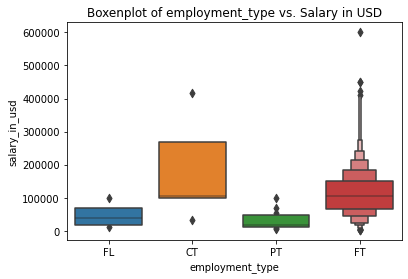

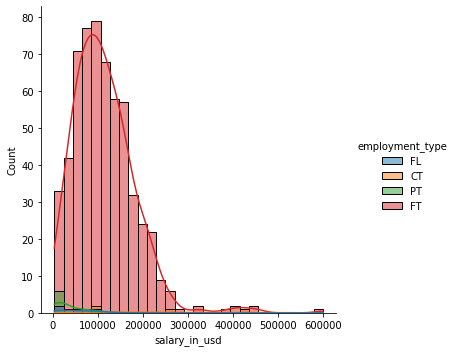

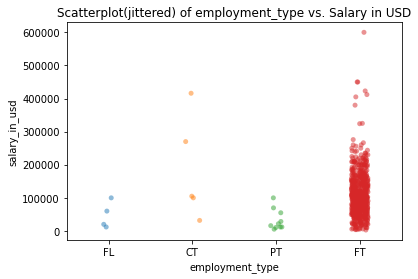

------------The above is the 4 plots of employment_type Category------------


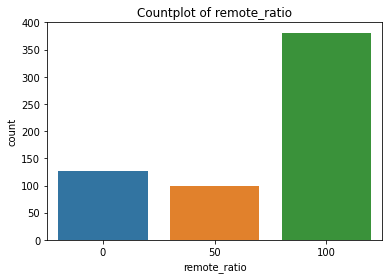

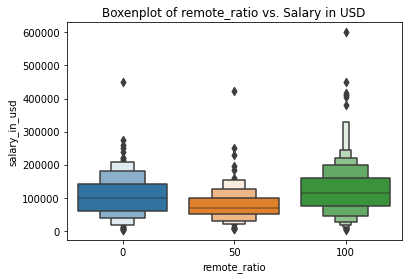

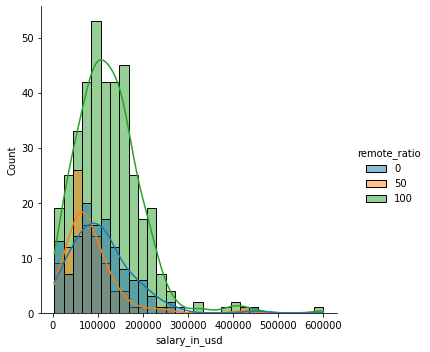

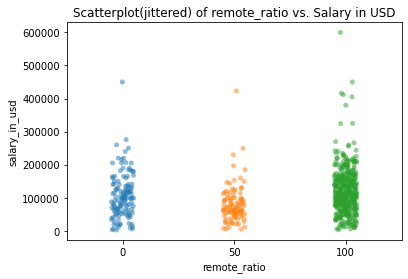

------------The above is the 4 plots of remote_ratio Category------------


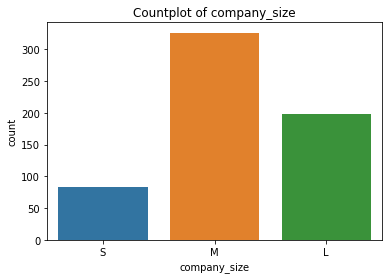

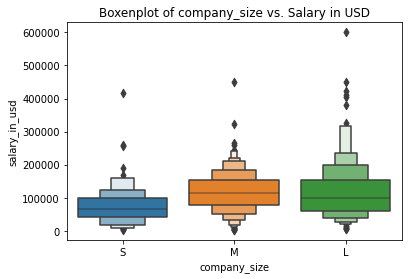

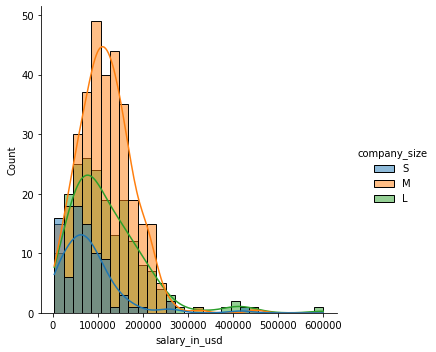

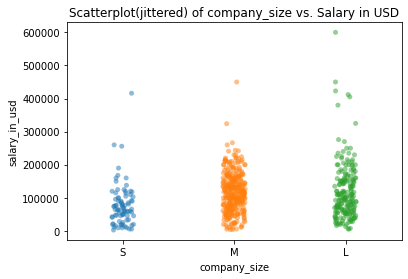

------------The above is the 4 plots of company_size Category------------


In [9]:
make_plots(ds_salary)

### Sectional EDA insights <a name="1-3-1"></a>
1. **Experience Level related insights**:
    - Many of the job in the dataset are senior level positions, with executive positions being only a tiny portion. It may indicate that data science jobs are strong in supportive roles and many of them requires a good knowledge/engineering basis. However, if sample is representative of the population, then it means data science related positions hardly transform into executive positions under the current value chain.

    - As expected, people with more experience level gets paid more, however their salary tend to vary more as well, noted by the more 'uniform' distribution within IQR.

    - Entry level jobs tends to have narrower salary range, more data are centered around median salary



2. **Employment Type related insights**:
    - More than 95% of the employments are **full-time**

    - Surprisingly **contracters** have higher 75th percentile value but similar median with **full-time**, this may be due to other factors such as country of the company and the employee/contractor's residence country, as demanded contract payment can vary a lot depending on those factors.

    - It will be interesting to investigate the long-tail in **full-time** employment salary to see which factors are making the tail

    - No surprise on the distribution plot as it is like any income distribution: *assembles a right-skewed distribution*
    
    - **ignore** non-fulltime jobs are they might produce outliers for univariate analysis



3. **Remote ratio related insights**:
    - Rather surprising to see more than half of the data science jobs are fully remote, gives 2 possiblities.
        - Data science works can mostly be done remotely and the location have little impact on quality of work.
        - The high remote ratio are largely due to the COVID-19 pandemic timeline (This can be verified later when comparing remote ratio across 2020-2022), 2022 positions *should* have a significantly lower remote ratio.
    - Another unexpected trend is that fully remote work have little impact on salary with no visual difference between the two, will need to investigate futher using hypothesis testing
        - Partially remote jobs are paid less with a narrower salary range may because of their **employment type**, most freelancer/contractor works in such mode, will investigate further to find out
        
 
 
4. **Company size related insights**:
    - A little over half of the companies are mid-size in this dataset.
        - mid-size companies has a higher salary median and narrower salary range than large companies, it will be interesting to see if the salaries are truely different using 2-sample hypothesis testing
        - small-size companies has lower salary overall, which is plausible as they may still be finding a scalable/sustainble/profitable business model
        
    - We can see large-size companies have a wider range in salary in both boxenplot and distribution plot, indicating a salaries are differentiated more (higher standard-deviation than small and mid-size companies)
    

### Drop outliers <a name='1-3-2'><a/>

**Outliers**
    - We can see that having *400000 annual salary or more* is 1.5 IQR above Q3 in all boxen plots, thus we will declare such values as outliers
    - On the other hand, having *10000 annual salary or less* is not only 1.5 IQR below Q1 in some boxen plots, but also **unrealistic** for a Data Science job and can induce noise into model building, thus we will declare them 

In [10]:
ds_salary.drop(ds_salary[(ds_salary['salary_in_usd'] >= 400000) | (ds_salary['salary_in_usd'] <= 10000)].index, inplace=True)
ds_salary.drop(ds_salary[(ds_salary['salary_in_usd'] >= 300000) & (ds_salary['experience_level'] == 'SE')].index, inplace=True)

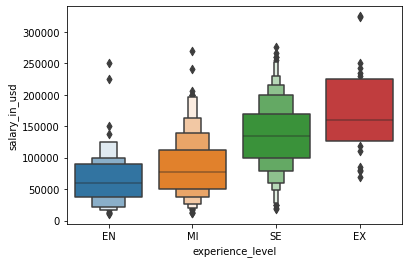

<AxesSubplot:xlabel='experience_level', ylabel='salary_in_usd'>

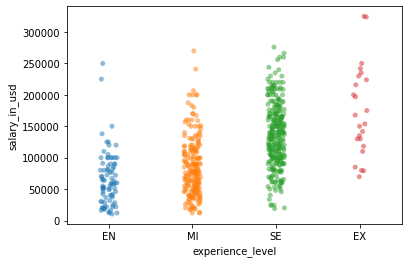

In [11]:
sns.boxenplot(data=ds_salary, y='salary_in_usd', x='experience_level')
plt.show()
plt.clf()
sns.stripplot(data=ds_salary, y= 'salary_in_usd', x='experience_level', alpha=0.5)

## Step 2-1: Drop all `employment_type` except **Full-Time** <a name="2-1"></a>
- The number of instances of other `employment_type` is insignificant **(about 3% of total data)** 
- Since it may produce outlier/bias to the dataset and will complicate the later regression model, we **drop** the feature

In [12]:
ds_salary_FT = ds_salary[ds_salary['employment_type'] == 'FT']
ds_salary_FT = ds_salary_FT.drop('employment_type', axis=1)

### Does *abroad jobs* have lower salaries? <a name="2-1-1"></a>
- From frist galance of a mean/median comparison between two groups, **YES**

In [13]:
work_abroad = ds_salary_FT[ds_salary_FT.employee_residence != ds_salary_FT.company_location]
work_in_residence = ds_salary_FT[ds_salary_FT.employee_residence == ds_salary_FT.company_location]

mean_work_in_residence = work_in_residence['salary_in_usd'].mean()
median_work_in_residence = work_in_residence['salary_in_usd'].median()

mean_work_abroad = work_abroad['salary_in_usd'].mean()
median_work_abroad = work_abroad['salary_in_usd'].median()

print(f'mean and median salary of people working abroad are {mean_work_abroad} and {median_work_abroad}')
print(f'mean and median salary of people working in resident country are {mean_work_in_residence} and {median_work_in_residence}')

mean and median salary of people working abroad are 87077.14285714286 and 69084.5
mean and median salary of people working in resident country are 113792.73384030418 and 109012.0


#### Dive deeper into the issue and take a look at people's resident country
   - Despite the 'by country' highest mean salary happens in work_abroad data, its mean and median are still lower than those in work_in_residence
   - The observation could be attributed to the fact that these *working aboard* cases are rare and *special* with reasons, and can be noisy within dataset
   - However, it's worthy to note that at glance, employee_residence is more of a key factor affecting salary, more so than company_location, indicating *abroad* or *not abroad* may not have a significant impact on salary
   - Thus, I keep the abroad data in for now, and do with/without it R2 comparison when doing Linear Regression

In [14]:
print(work_abroad.groupby(['employee_residence','company_location'])['salary_in_usd'].mean().sort_values(ascending=False))
print(work_in_residence.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False))

employee_residence  company_location
US                  CA                  225000.0
MY                  US                  200000.0
PR                  US                  160000.0
IT                  PL                  153667.0
US                  FR                  152000.0
IN                  US                  134698.0
ES                  US                  130800.0
BR                  US                  130000.0
SG                  IL                  119059.0
PL                  GB                  114047.0
JE                  CN                  100000.0
DE                  US                   95746.0
GR                  DK                   88654.0
FR                  DE                   87932.0
NL                  DE                   85000.0
BG                  US                   80000.0
RO                  GB                   76833.0
BO                  US                   75000.0
FR                  ES                   69741.0
GR                  US          

In [15]:
print(ds_salary_FT[(ds_salary_FT['employee_residence'] != ds_salary_FT['company_location']) & (ds_salary_FT['remote_ratio'] == 0)])

# reside in a different country with the company location while having a remote_ratio of 0 makes no sense, thus we should remove datapoints [182, 213, 281]
ds_salary_FT = ds_salary_FT.drop([182, 281], axis=0)
print('------------------------------------------------------------------------')
print(ds_salary_FT[(ds_salary_FT['employee_residence'] != ds_salary_FT['company_location']) & (ds_salary_FT['remote_ratio'] == 0)])

    work_year experience_level           job_title  salary_in_usd  \
id                                                                  
182      2021               MI       Data Engineer          26005   
281      2021               EN  Research Scientist         100000   

    employee_residence remote_ratio company_location company_size  
id                                                                 
182                 RO            0               US            L  
281                 JE            0               CN            L  
------------------------------------------------------------------------
Empty DataFrame
Columns: [work_year, experience_level, job_title, salary_in_usd, employee_residence, remote_ratio, company_location, company_size]
Index: []


## Step 2-2: Grouping country columns into two categories `developing` and `developed` <a name='2-2'><a/>

#### Notice that some residencial country appears very few times
- These less frequent country datapoints provide little value to the later analysis and will removed for easier model interpretation
- We will **bin** the `employee_residence` and `company_location` into 'developed' and 'developing' countries
    - NOTE: Used 150% World GDP per Capita (PPP) as the sole 'development status' split point
        - [Datasource](https://www.worldometers.info/gdp/gdp-per-capita/)

In [16]:
ds_salary_FT['employee_residence'].value_counts()

US    321
GB     44
CA     28
DE     23
IN     23
FR     18
ES     14
GR     13
JP      7
BR      5
PT      5
PL      4
NL      4
PK      3
AT      3
AU      3
AE      3
RU      3
TR      3
IT      2
VN      2
BE      2
SG      2
SI      2
HU      2
LU      1
CZ      1
AR      1
PR      1
MD      1
EE      1
BO      1
RS      1
IE      1
HK      1
MY      1
NG      1
CO      1
RO      1
CL      1
MT      1
UA      1
IQ      1
BG      1
HR      1
DK      1
PH      1
MX      1
CN      1
NZ      1
HN      1
CH      1
Name: employee_residence, dtype: int64

In [17]:
# create country categories and replace relevant data in 'employee_residence' and 'company_location'
country_cat = {'developed': ['DE','JP','GB','US','HU','NZ','FR','PL','PT','GR','AE','NL','CA','AT','ES','DK','HR','IT','SG','BE','RU','RO','SI','HK','TR','LU','CZ','MY','EE','AU','IE','CH','IL'], 
               'developing': ['HN','IN','PK','CN','MX','NG','PH','BG','IQ','VN','BR','UA','MT','CL','IR','CO','MD','KE','RS','PR','JE','AR','BO','AS']}
country_cat = {v: k for k,vv in country_cat.items() for v in vv}

ds_salary_FT.loc[:, 'employee_residence'] = ds_salary_FT['employee_residence'].map(country_cat).astype('category')
ds_salary_FT.loc[:, 'company_location'] = ds_salary_FT['company_location'].map(country_cat).astype('category')

In [18]:
mean_wage_by_residence = ds_salary_FT.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False)
mean_wage_by_residence

employee_residence
developed     117909.206963
developing     49533.734694
Name: salary_in_usd, dtype: float64

In [19]:
residence_pairwise = pg.pairwise_tests(data=ds_salary_FT, 
                                           dv='salary_in_usd',
                                           between='employee_residence',
                                           alternative='greater')

comp_loc_pairwise = pg.pairwise_tests(data=ds_salary_FT, 
                                           dv='salary_in_usd',
                                           between='company_location',
                                           alternative='greater')
print(residence_pairwise)
print(comp_loc_pairwise)

             Contrast          A           B  Paired  Parametric          T  \
0  employee_residence  developed  developing   False        True  10.416501   

         dof alternative         p-unc       BF10    hedges  
0  64.304182     greater  9.743229e-16  2.273e+20  1.257654  
           Contrast          A           B  Paired  Parametric          T  \
0  company_location  developed  developing   False        True  18.871957   

         dof alternative         p-unc       BF10    hedges  
0  67.584985     greater  6.026162e-29  1.982e+58  1.546477  


## Is `job_title` a meaningful feature in `ds_salary_FT` ? <a name='2-3' ><a/>
- Since data science positions are fairly new comparing to more traditional ones, `job_title` can vary a lot depending on the company, thus it may be inaccurate to describe the exact work and responsibility
- **job description** usually better depicts the related role, but we doesn't have **JD** data available here
- We will find mean and median salary by `employee_residence` and `job_title` to analyze the relationship

In [20]:
# salary by title data
# high positive diff meaning large salary outliers/right skewness, high negative diff meaning has low salary outliers/left skewness
mean_median_wage_diff_by_title = ((ds_salary_FT.groupby('job_title')['salary_in_usd'].mean()) - (ds_salary_FT.groupby('job_title')['salary_in_usd'].median())).sort_values(ascending=False)

mean_wage_by_title = ds_salary_FT.groupby('job_title')['salary_in_usd'].sum().sort_values(ascending=False)
median_wage_by_title = ds_salary_FT.groupby('job_title')['salary_in_usd'].median().sort_values(ascending=False)

# construct the 3 most frequent data science job titles, by 'developing' and 'developed' country
developed_ds_salary = ds_salary_FT[ds_salary_FT['employee_residence'] == 'developed']
deved_freq_3 = list(developed_ds_salary.groupby('job_title')['salary_in_usd'].count().sort_values(ascending=False)[:3].index)

developing_ds_salary = ds_salary_FT[ds_salary_FT['employee_residence'] == 'developing']
deving_freq_3 = list(developing_ds_salary.groupby('job_title')['salary_in_usd'].count().sort_values(ascending=False)[:3].index)

In [21]:
top_freq_title = list(set(deved_freq_3+deving_freq_3))
# print(top_freq_title)

deved_salary_by_title = developed_ds_salary.groupby('job_title')[['job_title', 'salary_in_usd']].mean().sort_values(by='salary_in_usd',ascending=False)
deving_salary_by_title = developing_ds_salary.groupby('job_title')[['job_title','salary_in_usd']].mean().sort_values(by='salary_in_usd',ascending=False)


print('The Most Frequent Developed Country DS Job Title and Salary')
print(deved_salary_by_title[deved_salary_by_title.index.isin(top_freq_title)])
print('--------------------------------------------------------------------------------')
print('The Most Frequent Developing Country DS Job Titles and Salary')
print(deving_salary_by_title[deving_salary_by_title.index.isin(top_freq_title)])

The Most Frequent Developed Country DS Job Title and Salary
                           salary_in_usd
job_title                               
Data Engineer              119655.165289
Data Scientist             118414.512397
Machine Learning Engineer  114564.000000
Data Analyst                96697.836957
--------------------------------------------------------------------------------
The Most Frequent Developing Country DS Job Titles and Salary
                           salary_in_usd
job_title                               
Data Analyst                80000.000000
Data Engineer               37787.000000
Machine Learning Engineer   35156.400000
Data Scientist              34787.928571


### There seems to be reasonable gaps among *Data Analyst*, *Data Scientist*, and *Data Engineer*
- The result matches with the common belief of how these roles are valued
- However, there are many other job titles, simply ignoring them will be a waste
- Thus, we have to find a effective way of bagging them into fewer categories and verify these categories can still be differentiated and somewhat follows common belief (prepare for dummy encoding)

### Check where does the **gap** happens
- The result shows that there is a more significant salary gap between *Analyst* and *Non-Analyst* job titles than between other job titles
- Thus, we will bag `jobs_title` into *Analyst* and *Non-Analyst* 

In [22]:
print('Average salary with title containing "Analyst"', ds_salary_FT['salary_in_usd'][ds_salary_FT['job_title'].str.contains('Analyst')].mean())

print('Average salary with title containing "Scientist"',ds_salary_FT['salary_in_usd'][ds_salary_FT['job_title'].str.contains('Scientist')].mean())
print('Average salary with title containing "Engineer"',ds_salary_FT['salary_in_usd'][ds_salary_FT['job_title'].str.contains('Engineer')].mean())
print('Average salary with title containing "Machine Learning"',ds_salary_FT['salary_in_usd'][ds_salary_FT['job_title'].str.contains('Machine Learning')].mean())

print('Average salary with title NOT containing "Analyst"',ds_salary_FT['salary_in_usd'][~ds_salary_FT['job_title'].str.contains('Analyst')].mean())

Average salary with title containing "Analyst" 94514.18918918919
Average salary with title containing "Scientist" 112225.51136363637
Average salary with title containing "Engineer" 111629.20642201835
Average salary with title containing "Machine Learning" 110404.71186440678
Average salary with title NOT containing "Analyst" 116253.05054945055


### Grouping `job_title` into *Analyst* and *Non-Analyst* <a name='3-3-1'><a/>
- Reasoning drawn from results above

In [23]:
ds_salary_FT['job_title'][ds_salary_FT['job_title'].str.contains('Analyst')] = 'Analyst'
ds_salary_FT['job_title'][~ds_salary_FT['job_title'].str.contains('Analyst')] = 'Non-Analyst'
ds_salary_FT['job_title'].unique()

array(['Non-Analyst', 'Analyst'], dtype=object)

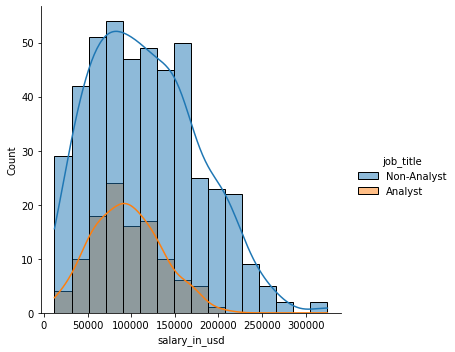

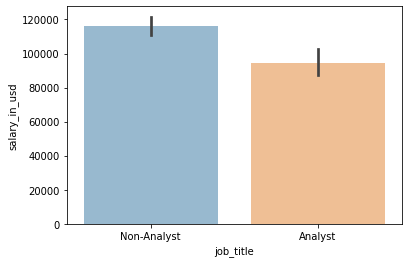

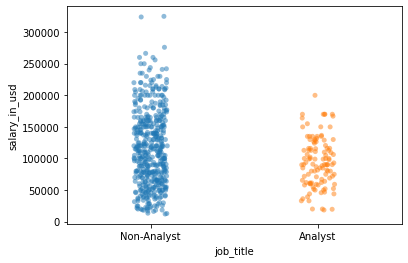

<Figure size 432x288 with 0 Axes>

In [24]:
sns.displot(data=ds_salary_FT, x= 'salary_in_usd', kde=True,alpha=0.5, hue='job_title')
plt.show()
sns.barplot(data=ds_salary_FT, y= 'salary_in_usd', x='job_title', alpha=0.5)
plt.show()
sns.stripplot(data=ds_salary_FT, y= 'salary_in_usd', x='job_title', alpha=0.5)
plt.show()
plt.clf()

In [25]:
title_pairwise = pg.pairwise_tests(data=ds_salary_FT, 
                                           dv='salary_in_usd',
                                           between='job_title',
                                           alternative='less')
title_pairwise

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,job_title,Analyst,Non-Analyst,False,True,-4.676587,257.615707,less,0.000002,7485.685,-0.381157


#### We are 95% confident that *Non-Analyst titles have higher salary than Analyst titles* is not caused by random chance
- Thus, grouping title into *Analyst* and *Non-Analyst* is valid and will be kept as such

## Step 3-1 Hypothesis Testings and feature groupings <a name='3-1'><a/>

### Does `work_year` makes a difference in salary? <a name='3-1-1'><a/>
- ANOVA test
- If passed, Pairwise test to see which pairs are *different* (p-value corrected using Bonferroni)

In [26]:
work_year_anova = pg.anova(data=ds_salary_FT,
                            dv='salary_in_usd',
                            between='work_year')
work_year_anova

,Source,ddof1,ddof2,F,p-unc,np2
0,work_year,2,563,15.467752,2.887378e-07,0.052086


In [27]:
work_year_pairwise = pg.pairwise_tests(data=ds_salary_FT, 
                                           dv='salary_in_usd',
                                           between='work_year',
                                           padjust='bonf',
                                           alternative='less')
work_year_pairwise

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,work_year,2020,2021,False,True,-0.364167,100.002609,less,3.582509e-01,1.000000,bonf,0.339,-0.053489
1,work_year,2020,2022,False,True,-3.520869,80.812699,less,3.550362e-04,0.001065,bonf,96.591,-0.523056
2,work_year,2021,2022,False,True,-4.912337,383.763939,less,6.673871e-07,0.000002,bonf,1.979e+04,-0.457571


#### Assume alpha = 0.05, both 2020 vs. 2022 and 2021 vs. 2022's p-value (corrected) is less than alpha
- We are 95% confident that *partial* remote jobs has different wages is not caused by random chance
- Therefore, we can set `work year` into two categories, **before 2022** and **2022**

In [28]:
ds_salary_FT['work_year'] = ds_salary_FT['work_year'].astype('int')

ds_salary_FT['work_year'][(ds_salary_FT['work_year'] == 2020) | (ds_salary_FT['work_year'] == 2021) ] = 'before 2022'
ds_salary_FT['work_year'][ds_salary_FT['work_year'] == 2022] = '2022'

ds_salary_FT['work_year'].unique()

array(['before 2022', '2022'], dtype=object)

### Does `remote_ratio` makes a difference in salary? <a name='3-1-2'><a/>
- ANOVA test
- If passed, Pairwise test to see which pairs are *different* (p-value corrected using Bonferroni)

In [29]:
remote_ratio_anova = pg.anova(data=ds_salary_FT,
                            dv='salary_in_usd',
                            between='remote_ratio')
remote_ratio_anova

,Source,ddof1,ddof2,F,p-unc,np2
0,remote_ratio,2,563,16.474395,1.113771e-07,0.055288


In [30]:
remote_ratio_pairwise = pg.pairwise_tests(data=ds_salary_FT, 
                                           dv='salary_in_usd',
                                           between='remote_ratio',
                                           padjust='bonf')
#                                            alternative='less')
remote_ratio_pairwise

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,remote_ratio,0,50,False,True,3.772819,204.981412,two-sided,2.112410e-04,6.337230e-04,bonf,102.996,0.508254
1,remote_ratio,0,100,False,True,-1.799438,199.266847,two-sided,7.346236e-02,2.203871e-01,bonf,0.554,-0.190781
2,remote_ratio,50,100,False,True,-6.775379,171.606931,two-sided,1.903272e-10,5.709816e-10,bonf,1.916e+08,-0.681197


#### We are 95% confident that *partial* remote jobs has different wages is not caused by random chance
- However, the question 'Why partial remote jobs are paid significantly less than fully or on-site jobs?' remains an mystery
- Thus, we will set `remote_ratio` into two categories, **partial** and **non-partial** 

In [31]:
ds_salary_FT['remote_ratio'] = ds_salary_FT['remote_ratio'].astype('int')

ds_salary_FT['remote_ratio'][(ds_salary_FT['remote_ratio'] == 0) | (ds_salary_FT['remote_ratio'] == 100) ] = 'non-partial'
ds_salary_FT['remote_ratio'][ds_salary_FT['remote_ratio'] == 50] = 'partial'

ds_salary_FT['remote_ratio'].unique()

array(['non-partial', 'partial'], dtype=object)

### Does *medium* or *large* `company_size` makes a difference in salary? <a name='3-1-3'><a/>
- We already know small company has lower salary than medium and large ones from boxen plot comparison 
- Pairwise test to see which pairs are *different* (p-value corrected using Bonferroni)

In [32]:
company_size_pairwise = pg.pairwise_tests(data=ds_salary_FT, 
                                           dv='salary_in_usd',
                                           between='company_size',
                                           padjust='bonf')
#                                            alternative='less')
company_size_pairwise

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,company_size,S,M,False,True,-5.547314,112.184899,two-sided,1.957031e-07,5.871092e-07,bonf,2.03e+05,-0.683509
1,company_size,S,L,False,True,-3.906893,159.468557,two-sided,1.378331e-04,4.134993e-04,bonf,169.6,-0.493496
2,company_size,M,L,False,True,1.376514,340.235089,two-sided,1.695677e-01,5.087030e-01,bonf,0.259,0.132564


#### We cannot reject Null Hypothesis: medium and large `company_size`'s salary is different 
- Thus, we will set `company_size` into two categories, **S** - small and **L** Large (Combining the original medium and large company categories) 

In [33]:
ds_salary_FT['company_size'] = ds_salary_FT['company_size'].astype('object')

ds_salary_FT['company_size'][ds_salary_FT['company_size'] == 'M'] = 'L'


ds_salary_FT['company_size'].unique()

array(['L', 'S'], dtype=object)

## Step 3-2: Final checks of Dataframe before OneHotEncoding features in `ds_salary_FT` <a name='3-2'><a/>

In [34]:
# Standardize non-ordinal categories to be 'object' data-type
ds_salary_FT['employee_residence'] = ds_salary_FT['employee_residence'].astype('object')
ds_salary_FT['company_location'] = ds_salary_FT['company_location'].astype('object')

ds_salary_FT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566 entries, 0 to 606
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           566 non-null    object  
 1   experience_level    566 non-null    category
 2   job_title           566 non-null    object  
 3   salary_in_usd       566 non-null    int64   
 4   employee_residence  566 non-null    object  
 5   remote_ratio        566 non-null    object  
 6   company_location    566 non-null    object  
 7   company_size        566 non-null    object  
dtypes: category(1), int64(1), object(6)
memory usage: 52.3+ KB


In [35]:
ds_salary_FT.sample(5)

,work_year,experience_level,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
id,,,,,,,,
491,2022,MI,Analyst,75000,developed,non-partial,developed,S
102,before 2022,MI,Analyst,36259,developed,partial,developed,L
598,2022,MI,Non-Analyst,160000,developed,non-partial,developed,L
410,2022,MI,Non-Analyst,71982,developed,non-partial,developed,L
460,2022,MI,Non-Analyst,58255,developed,partial,developed,L


## Step 4-1: Baseline Model - LinearRegression <a name='4-1'><a/>
### Linear Regression (OLS) and Ridge (L2 regularized)
- **one hot encode** nomial features:
    - `work_year` *dropped in final model due to negligible impact on model R2 Score, better feature interpretation*
    - `job_title`
    - `employee_residence`
    - `remote_ratio`
    - `company_location`
    - `company_size`
    
    
- **ordinal encode** 
    - `experience_level` **one hot encoded in the final model** *because of better model performance and interpretation*
    
    
- **target variable**
    - `salary_in_usd`

In [36]:
X = ds_salary_FT.drop('salary_in_usd', axis=1)
y = ds_salary_FT['salary_in_usd']

print(X.columns)
print(y.name)

Index(['work_year', 'experience_level', 'job_title', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')
salary_in_usd


### Preprocessing - OneHotEncoding and StandardScaling <a name='4-1-1'><a/>

In [37]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

column_trans = make_column_transformer(
    (OneHotEncoder(drop='first'), ['job_title', 'employee_residence',
       'remote_ratio', 'company_size','company_location', 'experience_level']),
#     (OrdinalEncoder(categories=[exp_cat]), ['experience_level']),
    remainder='drop')

std_scale = StandardScaler(with_mean=False)

preprocess_pipe = make_pipeline(column_trans, std_scale)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_lin = column_trans.fit_transform(X)
X_train_lin = column_trans.fit_transform(X_train)
X_test_lin = column_trans.transform(X_test)

# models
lin_reg = LinearRegression()
ridge = Ridge(alpha=0.01, max_iter=10000)

# Value Scaling (Normalization)
X_scale = preprocess_pipe.fit_transform(X)
y_scale = std_scale.fit_transform(y.values.reshape(-1,1))

# X_train data pipeline (OneHotEncode + StdScale)
X_train_scale = preprocess_pipe.fit_transform(X_train)
X_test_scale = preprocess_pipe.transform(X_test)

# y_train data pipeline (OneHotEncode + StdScale)
y_train_scale = std_scale.fit_transform(y_train.values.reshape(-1,1))
y_test_scale = std_scale.transform(y_test.values.reshape(-1,1))



### Uniform R2 Scoring Function
- A function that uses r2_score to evaluate model performance
- Returns r2_score of **training**, **validation**, and **cross_validation** data

In [38]:
def evaluate(model, train_features, train_labels, test_features, test_labels, **kwargs):
    train_pred = model.predict(train_features)
    test_pred = model.predict(test_features)
    r2_train = r2_score(train_labels, train_pred)
    r2_test = r2_score(test_labels, test_pred)
    print(f'{model} Model Performance')
    print('R2 Score of Training = {:0.6f}.'.format(r2_train))
    print('R2 Score of Validation = {:0.6f}.'.format(r2_test))
    if kwargs.get('X') is not None:
        r2_cv = cross_val_score(model, X=kwargs.get('X'), y=kwargs.get('y'), cv=5, scoring='r2').mean()
        print('5-folds CV Score = {:0.6f}.'.format(r2_cv))
    return r2_train, r2_test, r2_cv

### Linear Regression Fitting and Results <a name='4-1-2'><a/>

In [39]:
# To not sacrifice interpretability, we will use the unscaled y (target) variable here
lin_reg.fit(X_train_lin, y_train)
evaluate(lin_reg, X_train_lin, y_train, X_test_lin, y_test, X=X_lin, y=y)

print('------------------------------------------------------')

ridge.fit(X_train_scale, y_train)
evaluate(ridge, X_train_scale, y_train, X_test_scale, y_test, X=X_scale, y=y)
print('')

LinearRegression() Model Performance
R2 Score of Training = 0.417932.
R2 Score of Validation = 0.424766.
5-folds CV Score = 0.367507.
------------------------------------------------------
Ridge(alpha=0.01, max_iter=10000) Model Performance
R2 Score of Training = 0.417930.
R2 Score of Validation = 0.425318.
5-folds CV Score = 0.367507.



### L2 regularization model performs slightly better on the test set than OLS
- Features in the model **only explains about 40%** of the variations in the target variable

    - As shown above, many `job_titles` and `residence_country` only have **one** instance, making them weak to *represent* such instances
    - However, by grouping them into binary categories, I definitely masked many of the variations in such differences in `job_titles` and `residence_country`, thus resulting in much of the variation in target variable unexplained
    - Since the imported data have already been categorically coded, it is impossible to fully interpret some of the features
    - For example: What does a 20%-80% **remote_ratio** mean for a job? Why are jobs that have this **partial** remote have salaries that are particularly low? Are they secondary job titles that some senior/executive individual carries? (Which often pays less than full-time single responsibility ones)
    - Since **data** is a relatively new career path, many job titles can be far from job descriptions, and even further from the actual responbilities that one carries at work. 
        - (second-hand info) I know that many search for a *Data Analyst* title, but the responbilities/descriptions entails *Data Scientist*.
        - Since the imported data `ds_salaries.csv` *lacks job descriptions and further details*, such **mismatch** can provide heavy noise to the data set, thus partly exlpaining the **mid-low the model R2 score**

In [40]:
feature_names = ['is_Non-Analyst',
       'is_residence_developing', 'is_partial_remote',
       'is_small_company', 'is_company_developing', 'is_Executive',
       'is_Midlevel', 'is_Seniorlevel']

# OLS Regression
lin_coef_table = pd.DataFrame(feature_names).copy()
lin_coef_table.insert(len(lin_coef_table.columns),"OLS_coef",lin_reg.coef_.transpose())
lin_intercept = pd.DataFrame({0: 'Model_Intercept_(Base Salary)', 'OLS_coef': lin_reg.intercept_}, index=[0])
lin_coef_table = pd.concat([lin_coef_table, lin_intercept]).rename({0: 'feature_name'}, axis=1)

# Ridge Regression (alpha = 100)
ridge_coef_table = pd.DataFrame(feature_names).copy()
ridge_coef_table.insert(len(ridge_coef_table.columns),"Ridge_coef",ridge.coef_.transpose())
ridge_intercept = pd.DataFrame({0: 'Model_Intercept_(Base Salary)', 'Ridge_coef': ridge.intercept_}, index=[0])
ridge_coef_table = pd.concat([ridge_coef_table, ridge_intercept])

final_coef_table = pd.concat([lin_coef_table, ridge_coef_table], axis=1).drop(0,axis=1).set_index('feature_name')
final_coef_table

,OLS_coef,Ridge_coef
feature_name,,
is_Non-Analyst,31767.630182,12462.199330
is_residence_developing,-39351.670755,-11152.415042
is_partial_remote,-27185.161235,-9474.492223
is_small_company,-19207.072275,-5704.260693
is_company_developing,-33564.640642,-8498.017773
is_Executive,83103.866434,16677.586511
is_Midlevel,5113.781620,2469.749257
is_Seniorlevel,48151.032468,24069.693229
Model_Intercept_(Base Salary),70838.955485,70825.215151


In [41]:
the_impossible = ds_salary_FT[(ds_salary_FT['employee_residence'] == 'developing') & 
             (ds_salary_FT['company_location'] == 'developing')]
the_impossible = the_impossible[(the_impossible['job_title'] == 'Analyst')]
the_impossible

,work_year,experience_level,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
id,,,,,,,,
3,before 2022,MI,Analyst,20000,developing,non-partial,developing,S
92,before 2022,MI,Analyst,19609,developing,non-partial,developing,L
458,2022,MI,Analyst,18442,developing,non-partial,developing,L


## Step 4-2: Linear Model (OLS) coefficients interpretation  <a name='4-2'><a/>
    
- Note that all features are dummies, having a value of 0 or 1 

1. Does the model coefficients make sense for **all cases**? (Can predicted value be negative?)
    - **NO!**, when a *Data Analyst* is resides in a *developing country* and work in a *small* company in a *developing country* with a *partial* remote mode, having either a *Entry* or *Mid* level *experience*, his salary can be **NEGATIVE**
    - Paying to work for someone cannot be true (although it practically exists), it is beyond slavery!
    - **However**, the cause of the phenomenon could be **the lack of data** for such scenario, as shown in the `the_impossible` variable, resulting in the model's OLS slope extrapolating incorrectly for such scenarios
    - Thus, I **do not** recommend using the coefficients here for predicting any *partial* remote *Analyst* jobs that resides and work in a *developing country*, as the model can give a erroneous/inaccurate result, leading to confusion
    
    
2. How about predictions for the *developed* world? Does the result make sense?
    - For a `Entry level` `Data Analyst` living and working in a `developed` country that works `fully-remote` for a `large` company, one should expect an annual salary of ~ **70,000**
    - This is comparably close to Cousera's data of a US based Data Analyst's average annual salary of ~ **64,000**
    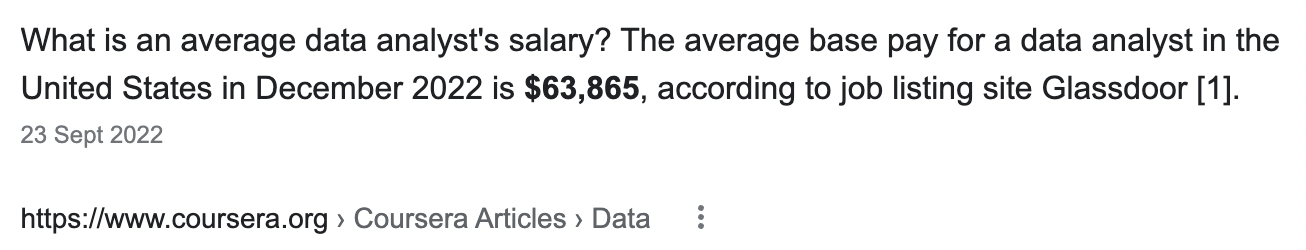

    
**3. Cofficient Interpretations**:
- **is_Non-Analyst**: On average, the **non-analyst** jobs tend to have ***31,767 USD higher*** annual salary than **analyst** jobs
- **is_residence_developing**: On average, those that reside in a **developing country** tend to have ***39,351 USD lower*** annual salary than those who reside in a **developed country**
- **is_partial_remote**: On average, the **partially remote** jobs tend to have ***27,185 USD lower*** annual salary than **fully remote or onsite** jobs
- **is_small_company**: On average, the **small company** jobs tend to have ***19,207 USD lower*** annual salary than **medium or large company** jobs
- **is_company_developing**: On average, jobs that locate in a **developing country** tend to have ***33,564 USD lower*** annual salary than those that locate in a **developed country**
- **is_Executive**: On average, **Executive level** jobs tend to be paid ***83,103 USD higher*** than **Entry level** jobs
- **is_Midlevel**: On average, **Mid level** jobs tend to be paid ***5,113 USD higher*** than **Entry level** jobs
- **is_Seniorlevel**: On average, **Senior level** jobs tend to be paid ***48,151 USD higher*** than **Entry level** jobs

- ***Intercept***: On average, an **Entry level** **Data Analyst** living in a **developed country** that works **fully remote or onsite** for a **medium or large** company located in a **developed country**, one should expect an annual salary of ***70,838 USD*** 



## Step 5-1 : Tree based ensemble models  <a name='5-1'><a/>
- Since all features are dummies ('discrete' as yes or no), it can be difficult for tree based models provide its advantage of finding non-linear relationships between features and target.
- However, as empirical as I want to be, it is still worth trying for a overall higher R2 Score using an ensemble model, sacrificing model interprebility
- Like Ridge Regression, tree models assumes data normality, thus I used the scaled data from here on

### Hyperparameter tunning - Plots & RandomSearchCV <a name='5-1-1'><a/>

In [42]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Create the random grid for RandomForest
random_grid_rf = {'n_estimators': [int(x) for x in np.linspace(500, 1000, 50)],
               'max_features': ['auto', 'sqrt', 'log2'],
               'max_depth': [int(x) for x in np.linspace(1, 20, 20)],
               'min_samples_split': [2, 3, 4, 5, 6],
               'min_samples_leaf': [2, 4, 6, 8, 10]}


# Create the random grid for GradientBoosting
random_grid_gb = {'n_estimators': [int(x) for x in np.linspace(1, 100, 20)],
               'max_features': ['auto', 'sqrt', 'log2'],
               'max_depth': [int(x) for x in np.linspace(1, 10, 10)],
               'min_samples_split': [int(x) for x in np.linspace(3, 300, 30)],
               'min_samples_leaf': [int(x) for x in np.linspace(3, 30, 30)],
               'learning_rate':[0.01, 0.1],
               'alpha': [0.3, 0.6, 0.9]}

# Construct base models
rf_base = RandomForestRegressor(random_state = 42)
gb_base = GradientBoostingRegressor(random_state = 42)

rf_random = RandomizedSearchCV(estimator = rf_base, param_distributions = random_grid_rf, n_iter = 500, cv = 3, random_state=42, n_jobs = -1)
gb_random = RandomizedSearchCV(estimator = gb_base, param_distributions = random_grid_gb, n_iter = 500, cv = 3, random_state=42, n_jobs = -1)

# Models optimized using BestForest/BestGB method (empirical visualizations)
rf = RandomForestRegressor(max_features='sqrt', min_samples_leaf=3, random_state = 42)
gb = GradientBoostingRegressor(n_estimators=90, max_features='log2', max_depth=4, min_samples_leaf=10, min_samples_split=220, random_state = 42)

#### Please check [Appendix](#A-1) for BestForest/BestGB usage, and check related Python files for details

In [43]:
rf_base.fit(X_train_scale, y_train_scale.ravel())
RF_Base = evaluate(rf_base, X_train_scale, y_train_scale, X_test_scale, y_test_scale, X=X_scale, y=y)
gb_base.fit(X_train_scale, y_train_scale.ravel())
GB_Base = evaluate(gb_base, X_train_scale, y_train_scale, X_test_scale, y_test_scale, X=X_scale, y=y)


rf.fit(X_train_scale, y_train_scale.ravel())
RF_Tuned = evaluate(rf, X_train_scale, y_train_scale, X_test_scale, y_test_scale, X=X_scale, y=y)
gb.fit(X_train_scale, y_train_scale.ravel())
GB_Tuned = evaluate(gb, X_train_scale, y_train_scale, X_test_scale, y_test_scale, X=X_scale, y=y)
print('')

RandomForestRegressor(random_state=42) Model Performance
R2 Score of Training = 0.468278.
R2 Score of Validation = 0.423009.
5-folds CV Score = 0.357959.
GradientBoostingRegressor(random_state=42) Model Performance
R2 Score of Training = 0.466361.
R2 Score of Validation = 0.386760.
5-folds CV Score = 0.356889.
RandomForestRegressor(max_features='sqrt', min_samples_leaf=3, random_state=42) Model Performance
R2 Score of Training = 0.447560.
R2 Score of Validation = 0.434219.
5-folds CV Score = 0.388401.
GradientBoostingRegressor(max_depth=4, max_features='log2', min_samples_leaf=10,
                          min_samples_split=220, n_estimators=90,
                          random_state=42) Model Performance
R2 Score of Training = 0.444731.
R2 Score of Validation = 0.434905.
5-folds CV Score = 0.387212.



In [44]:
rf_random.fit(X_train_scale, y_train_scale.ravel())
gb_random.fit(X_train_scale, y_train_scale.ravel())
print('')

In [45]:
rf_best_random = rf_random.best_estimator_
RF_RandomCV = evaluate(rf_best_random, X_train_scale, y_train_scale, X_test_scale, y_test_scale, X=X_scale, y=y)

gb_best_random = gb_random.best_estimator_
GB_RandomCV = evaluate(gb_best_random, X_train_scale, y_train_scale, X_test_scale, y_test_scale, X=X_scale, y=y)
print('')

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=948, random_state=42) Model Performance
R2 Score of Training = 0.457404.
R2 Score of Validation = 0.432561.
5-folds CV Score = 0.385105.
GradientBoostingRegressor(alpha=0.3, max_depth=5, max_features='log2',
                          min_samples_leaf=10, min_samples_split=136,
                          random_state=42) Model Performance
R2 Score of Training = 0.456073.
R2 Score of Validation = 0.417027.
5-folds CV Score = 0.384465.



### Model Fitting and Evaluation <a name='5-1-2'><a/>

In [46]:
forest_accuracies_dict = {'model': ['RF_Base', 'RF_Tuned', 'RF_RandomCV', 'GB_Base', 'GB_Tuned', 'GB_RandomCV'],
                         'r2_training': [RF_Base[0], RF_Tuned[0], RF_RandomCV[0], GB_Base[0], GB_Tuned[0], GB_RandomCV[0]],
                         'r2_validation': [RF_Base[1], RF_Tuned[1], RF_RandomCV[1], GB_Base[1], GB_Tuned[1], GB_RandomCV[1]],
                         'r2_cv5': [RF_Base[2], RF_Tuned[2], RF_RandomCV[2], GB_Base[2], GB_Tuned[2], GB_RandomCV[2]]}

forest_accuracies = pd.DataFrame(data=forest_accuracies_dict).sort_values(by='r2_cv5').reset_index().drop('index', axis=1)
forest_accuracies_t = forest_accuracies.T
forest_accuracies_t = forest_accuracies_t.rename(columns=forest_accuracies_t.iloc[0]).drop(forest_accuracies_t.index[0])

forest_accuracies

,model,r2_training,r2_validation,r2_cv5
0,GB_Base,0.466361,0.386760,0.356889
1,RF_Base,0.468278,0.423009,0.357959
2,GB_RandomCV,0.456073,0.417027,0.384465
3,RF_RandomCV,0.457404,0.432561,0.385105
4,GB_Tuned,0.444731,0.434905,0.387212
5,RF_Tuned,0.447560,0.434219,0.388401


### RF_Tuned and GB_Tuned are the two best tree based ensemble models
- They have the highest R2 CV score while having a relatively small gap between R2 Train and R2 Test scores (not as overfitted as some of the other models)
- Note that basemodels of both RandomForest and GradientBoosting are heavily overfitted and have low R2 CV scores
- I ended up able to tune both RF and GB models better than the RandomSearchCV ones, it took many trial and errors for a small gain in R2, thus using RandomSearchCV models is more practical when efficiency is the priority

- I will use **RF_Tuned** and **GB_Tuned** in other ensemble models (Voting and Stacking)

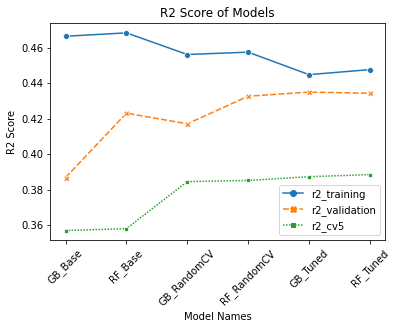

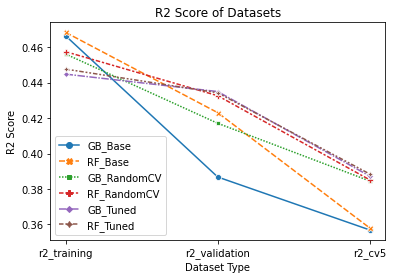

<Figure size 432x288 with 0 Axes>

In [47]:
r = sns.lineplot(data=forest_accuracies, markers=True)
r.set_xticks(range(6))
r.set_xticklabels(forest_accuracies['model'], rotation=45)
plt.ylabel('R2 Score')
plt.xlabel('Model Names')
plt.title('R2 Score of Models')
plt.show()
plt.clf()

sns.lineplot(data=forest_accuracies_t, markers=True)
plt.ylabel('R2 Score')
plt.xlabel('Dataset Type')
plt.title('R2 Score of Datasets')
plt.show()
plt.clf()

## Step 5-2: Other ensemble models - Voting and Stacking Regressor <a name='5-2'><a/>

In [48]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor, StackingRegressor

### Model Construction and Fitting <a name='5-2-1'><a/>
- Model choice and filtering in each ensemble is based on empirical trials

In [49]:
lasso = Lasso(alpha=100, max_iter=10000)

# Since we don't need to interpret model, we will choose best n neighbors instead of using the 'elbow' method
knr = KNeighborsRegressor(n_neighbors=15, metric='euclidean')

lasso.fit(X_train_scale, y_train)
knr.fit(X_train_scale, y_train_scale.ravel())

# Constructing and fitting two ensemble methods (VotingRegressor & StackingRegressor)
vot_reg = VotingRegressor(estimators=[
    ('rf', rf), 
    ('gb', gb),
    ('lr', lin_reg), 
    ('kn', knr)])

vot_reg = vot_reg.fit(X_train_scale, y_train_scale.ravel())

# StackingRegressor
estimators = [('rf', rf),
              ('ridge', ridge),
              ('lasso', lasso),
              ('knr', knr)]

final_estimator = lin_reg
stk_reg = StackingRegressor(estimators=estimators, final_estimator=final_estimator)
stk_reg.fit(X_train_scale, y_train_scale.ravel())
print('')

In [50]:
# OLS Reregssor Accuracy
print('OLS Regressor')
OLS_accuracy = evaluate(lin_reg, X_train_lin, y_train, X_test_lin, y_test, X=X_lin, y=y)

print('------------------------------------------')

# Ridge Reregssor Accuracy
print('Ridge Regressor')
ridge_accuracy = evaluate(ridge, X_train_scale, y_train, X_test_scale, y_test, X=X_scale, y=y)

print('------------------------------------------')

# Random Forest Reregssor Accuracy
print('Random Forest Regressor')
RF_accuracy = evaluate(rf, X_train_scale, y_train_scale.ravel(), X_test_scale, y_test_scale.ravel(), X=X_scale, y=y)

print('------------------------------------------')

# Gradient Boosting Reregssor Accuracy
print('Gradient Boosting Regressor')
GB_accuracy = evaluate(gb, X_train_scale, y_train_scale.ravel(), X_test_scale, y_test_scale.ravel(), X=X_scale, y=y)

print('------------------------------------------')

# Voting Regressor Accuracy
print('Voting Regressor')
voting_accuracy = evaluate(vot_reg, X_train_scale, y_train_scale.ravel(), X_test_scale, y_test_scale.ravel(), X=X_scale, y=y)

print('------------------------------------------')

# Stacking Regressor Accuracy
print('Stacking Regressor')
stk_accuracy = evaluate(stk_reg, X_train_scale, y_train_scale.ravel(), X_test_scale, y_test_scale.ravel(), X=X_scale, y=y)

OLS Regressor
LinearRegression() Model Performance
R2 Score of Training = 0.417932.
R2 Score of Validation = 0.424766.
5-folds CV Score = 0.367507.
------------------------------------------
Ridge Regressor
Ridge(alpha=0.01, max_iter=10000) Model Performance
R2 Score of Training = 0.417930.
R2 Score of Validation = 0.425318.
5-folds CV Score = 0.367507.
------------------------------------------
Random Forest Regressor
RandomForestRegressor(max_features='sqrt', min_samples_leaf=3, random_state=42) Model Performance
R2 Score of Training = 0.447560.
R2 Score of Validation = 0.434219.
5-folds CV Score = 0.388401.
------------------------------------------
Gradient Boosting Regressor
GradientBoostingRegressor(max_depth=4, max_features='log2', min_samples_leaf=10,
                          min_samples_split=220, n_estimators=90,
                          random_state=42) Model Performance
R2 Score of Training = 0.444731.
R2 Score of Validation = 0.434905.
5-folds CV Score = 0.387212.
------

### Evaluation and Model comparison <a name='5-2-2'><a/>

In [51]:
model_accuracies_dict = {'model': ['OLS', 'Ridge', 'Random Forest', 'Gradient Boosting', 'Voting', 'Stacking'],
                         'r2_training': [OLS_accuracy[0], ridge_accuracy[0], RF_accuracy[0], GB_accuracy[0], voting_accuracy[0], stk_accuracy[0]],
                         'r2_validation': [OLS_accuracy[1], ridge_accuracy[1], RF_accuracy[1], GB_accuracy[1], voting_accuracy[1], stk_accuracy[1]],
                         'r2_cv5': [OLS_accuracy[2], ridge_accuracy[2], RF_accuracy[2], GB_accuracy[2], voting_accuracy[2], stk_accuracy[2]]}

model_accuracies = pd.DataFrame(data=model_accuracies_dict).sort_values(by='r2_cv5').reset_index().drop('index', axis=1)
model_accuracies_t = model_accuracies.T
model_accuracies_t = model_accuracies_t.rename(columns=model_accuracies_t.iloc[0]).drop(model_accuracies_t.index[0])

model_accuracies

,model,r2_training,r2_validation,r2_cv5
0,Ridge,0.417930,0.425318,0.367507
1,OLS,0.417932,0.424766,0.367507
2,Voting,0.446915,0.441091,0.385534
3,Gradient Boosting,0.444731,0.434905,0.387212
4,Random Forest,0.447560,0.434219,0.388401
5,Stacking,0.448147,0.443017,0.388798


### All ensemble methods have significantly better in R2 Score than OLS and Ridge
- Voting and Stacking ensemble models are able to perform slightly better than the best RandomForest and GradientBoosting model, though the performance difference is likely not statistically significant
- Because OLS is not overfitting on training data to start with, Ridge Regressor wasn't able to gain overall performance (They performanceed nearly identical, indicating minimum feature importance/filtering happening in Ridge model)

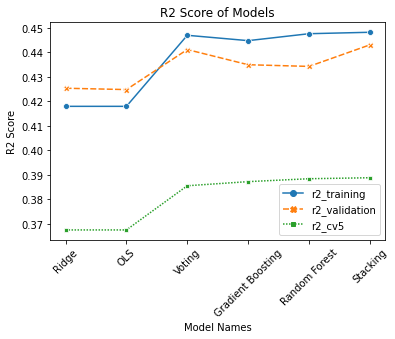

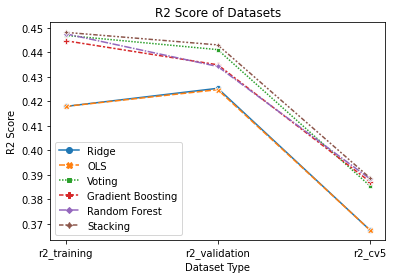

<Figure size 432x288 with 0 Axes>

In [52]:
p = sns.lineplot(data=model_accuracies, markers=True)
p.set_xticks(range(6))
p.set_xticklabels(model_accuracies['model'], rotation=45)
plt.ylabel('R2 Score')
plt.xlabel('Model Names')
plt.title('R2 Score of Models')
plt.show()
plt.clf()


sns.lineplot(data=model_accuracies_t, markers=True)
plt.ylabel('R2 Score')
plt.xlabel('Dataset Type')
plt.title('R2 Score of Datasets')
plt.show()
plt.clf()

## Appendix

In [53]:
from best_forest import BestForest
from best_gb import BestGB

### Finding best K for KNeighborsRegressor <a name='A-1'><a/>

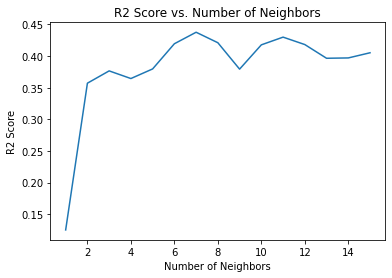

Best R2 Score 0.4376119904442751 happens with n_neighbors of 7.0


<Figure size 432x288 with 0 Axes>

In [54]:
def find_n_neighbors(max_value, n_of_values):
    n_neighbors = {}
    for n in np.linspace((max_value//n_of_values), max_value, n_of_values):
        knr_test = KNeighborsRegressor(n_neighbors=int(n), metric='euclidean')
        knr_test.fit(X_train_scale, y_train_scale.ravel())
        n_neighbors[n] = knr_test.score(X_test_scale, y_test_scale.ravel())
    plt.plot(np.linspace((max_value//n_of_values), max_value, n_of_values), list(n_neighbors.values()))
    plt.xlabel('Number of Neighbors')
    plt.ylabel('R2 Score')
    plt.title('R2 Score vs. Number of Neighbors')
    plt.show()
    plt.clf()
    best_r2 = max(n_neighbors, key=n_neighbors.get)
    print(f'Best R2 Score {n_neighbors[best_r2]} happens with n_neighbors of {best_r2}')
find_n_neighbors(15,15)

### Finding 'best' parameters for RandomForestRegressor (Manual Hyperparameter Tunning) <a name='A-2'><a/>

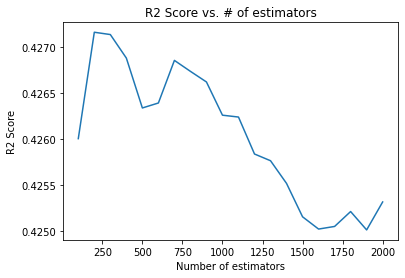

Best R2 Score 0.42716342722371425 happens with 200.0 of estimators


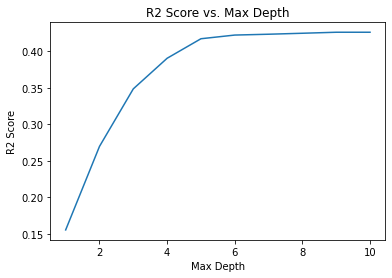

Best R2 Score 0.4260059101544672 happens with max_depth of 9.0


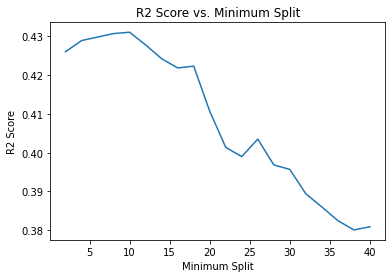

Best R2 Score 0.4310138062578298 happens with min_sample_split of 10.0


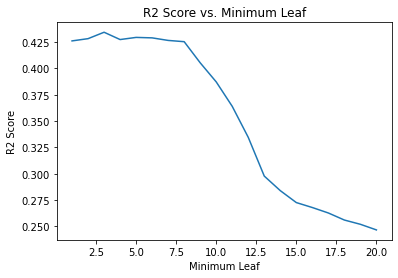

Best R2 Score 0.43421894807953254 happens with min_samples_leaf of 3.0


<Figure size 432x288 with 0 Axes>

In [55]:
find_forest = BestForest(X_train_scale, y_train_scale, X_test_scale, y_test_scale)
find_forest.find_n_estimators(2000,20)
find_forest.find_max_depth(10,10)
find_forest.find_min_sample_split(40,20)
find_forest.find_min_samples_leaf(20,20)

### Finding 'best' parameters for GradientBoostingRegressor (Manual Hyperparameter Tunning) <a name='A-3'><a/>

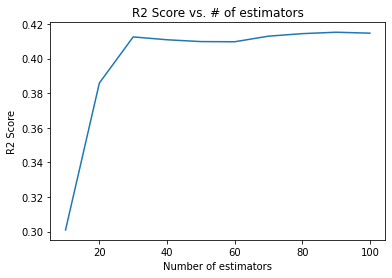

Best R2 Score 0.41517728160717327 happens with 90.0 of estimators


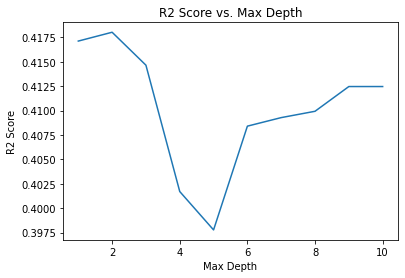

Best R2 Score 0.4180229773937949 happens with max_depth of 2.0


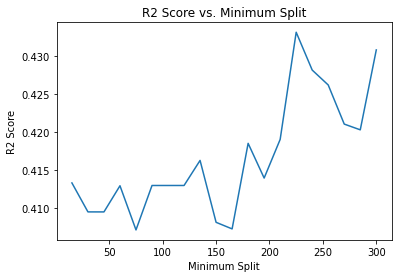

Best R2 Score 0.4331050203144917 happens with min_sample_split of 225.0


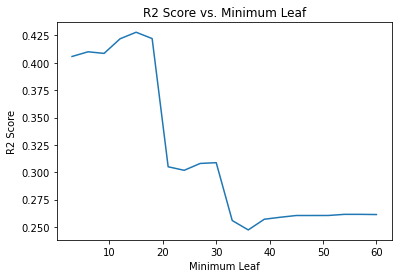

Best R2 Score 0.42796794054531695 happens with min_samples_leaf of 15.0


<Figure size 432x288 with 0 Axes>

In [56]:
find_gb = BestGB(X_train_scale, y_train_scale, X_test_scale, y_test_scale)
find_gb.find_n_estimators(100,10)
find_gb.find_max_depth(10,10)
find_gb.find_min_sample_split(300,20)
find_gb.find_min_samples_leaf(60,20)